In [1]:
import pandas as pd 
import os   
import matplotlib.pyplot as plt
import matplotlib 
import time 
from IPython.core.display import display, HTML
import ast
import seaborn as sns
#import geopandas as gpd

#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
%%time
# ABRIMOS EL ARCHIVO
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
data_oscars

Wall time: 74.2 ms


year_film  year_ceremony  ceremony                          category  \
0           1927           1928         1                             ACTOR   
1           1927           1928         1                             ACTOR   
2           1927           1928         1                           ACTRESS   
3           1927           1928         1                           ACTRESS   
4           1927           1928         1                           ACTRESS   
...          ...            ...       ...                               ...   
10390       2019           2020        92     WRITING (Original Screenplay)   
10391       2019           2020        92  JEAN HERSHOLT HUMANITARIAN AWARD   
10392       2019           2020        92                    HONORARY AWARD   
10393       2019           2020        92                    HONORARY AWARD   
10394       2019           2020        92                    HONORARY AWARD   

                                                    name              film  \
0                                    Richard Barthelmess         The Noose   
1                                          Emil Jannings  The Last Command   
2                                         Louise Dresser   A Ship Comes In   
3                                           Janet Gaynor        7th Heaven   
4                                         Gloria Swanson    Sadie Thompson   
...                                                  ...               ...   
10390  Screenplay by Bong Joon Ho, Han Jin Won; Story...          Parasite   
10391                                        Geena Davis               NaN   
10392                                        David Lynch               NaN   
10393                                          Wes Studi               NaN   
10394                                    Lina Wertmüller               NaN   

       winner  
0       False  
1        True  
2       False  
3        True  
4       False  
...       ...  
10390    True  
10391    True  
10392    True  
10393    True  
10394    True  

[10395 rows x 7 columns]

In [3]:
%%time
# ABRIMOS EL ARCHIVO
data_oscars = pd.read_csv(os.path.join("oscar_award.csv","the_oscar_award.csv"))
# ELIMINAMOS DATOS NULOS
data_oscars = data_oscars.dropna()

# MODIFICAMOS MOMENTANEAMENTE EL NOMBRE PARA PODER GENERAR DATAFRAME
for ind in data_oscars.index:
    film,year = data_oscars['film'][ind],data_oscars['year_film'][ind] 
    data_oscars['film'][ind]=f'{film}[{year}]' 
    
# GENERAMOS UNA LISTA CON CADA PELICULA DISTINTA, DIFERENCIADAS POR SU TITULO Y AÑO PARA NO AGRUPAR REMASTERIZACIONES
movies = []
nominaciones = []
wins = []
for movie in data_oscars['film']:
    if movie not in movies:
        movies.append(movie)

for movie in movies:
    nomin = len(data_oscars[data_oscars['film']==movie])
    nominaciones.append(nomin)
    ganadas = len(data_oscars[(data_oscars['film']==movie)&(data_oscars['winner']==True)])
    wins.append(ganadas)

# GENERAMOS DATAFRAME
diccionario_df = {'Pelicula': movies, 'Nominaciones': nominaciones, 'Premios': wins} 

df = pd.DataFrame(diccionario_df)
#ese es de las nominaciones
df

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


Wall time: 20.1 s


Pelicula  Nominaciones  Premios
0             The Noose[1927]             1        0
1      The Last Command[1927]             2        1
2       A Ship Comes In[1927]             1        0
3            7th Heaven[1927]             5        3
4        Sadie Thompson[1927]             1        0
...                       ...           ...      ...
4929           A Sister[2019]             1        0
4930           Ad Astra[2019]             1        0
4931  Avengers: Endgame[2019]             1        0
4932      The Lion King[2019]             1        0
4933         Knives Out[2019]             1        0

[4934 rows x 3 columns]

In [4]:
%%time
data_ratings = pd.read_csv(os.path.join("ratings_small.csv","ratings_small.csv"))

movies_id = []
ratings = []
cant_ratings = []
for Id in data_ratings['movieId'].unique():
    movies_id.append(Id)
    ratings.append(round(data_ratings[data_ratings['movieId']==Id]['rating'].mean(),1))
    cant_ratings.append(len(data_ratings[data_ratings['movieId']==Id]))

diccionario_ratings = {'IdPelicula': movies_id, 'RatingProm': ratings, 'Cant_Ratings': cant_ratings} 

df_ratings = pd.DataFrame(diccionario_ratings)
df_ratings

Wall time: 15.5 s


IdPelicula  RatingProm  Cant_Ratings
0             31         3.2            42
1           1029         3.7            42
2           1061         3.5            33
3           1129         3.3            48
4           1172         4.3            46
...          ...         ...           ...
9061       64997         2.5             1
9062       72380         3.5             1
9063         129         3.0             1
9064        4736         1.0             1
9065        6425         1.0             1

[9066 rows x 3 columns]

In [5]:
data_movies = pd.read_csv(os.path.join("movies_metadata.csv","movies_metadata.csv"))
data_movies.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


adult                              belongs_to_collection    budget  \
0  False  {'id': 10194, 'name': 'Toy Story Collection', ...  30000000   
1  False                                                NaN  65000000   
2  False  {'id': 119050, 'name': 'Grumpy Old Men Collect...         0   
3  False                                                NaN  16000000   
4  False  {'id': 96871, 'name': 'Father of the Bride Col...         0   

                                              genres  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
4                     [{'id': 35, 'name': 'Comedy'}]   

                               homepage     id    imdb_id original_language  \
0  http://toystory.disney.com/toy-story    862  tt0114709                en   
1                                   NaN   8844  tt0113497                en   
2                                   NaN  15602  tt0113228                en   
3                                   NaN  31357  tt0114885                en   
4                                   NaN  11862  tt0113041                en   

                original_title  \
0                    Toy Story   
1                      Jumanji   
2             Grumpier Old Men   
3            Waiting to Exhale   
4  Father of the Bride Part II   

                                            overview  ... release_date  \
0  Led by Woody, Andy's toys live happily in his ...  ...   1995-10-30   
1  When siblings Judy and Peter discover an encha...  ...   1995-12-15   
2  A family wedding reignites the ancient feud be...  ...   1995-12-22   
3  Cheated on, mistreated and stepped on, the wom...  ...   1995-12-22   
4  Just when George Banks has recovered from his ...  ...   1995-02-10   

       revenue runtime                                   spoken_languages  \
0  373554033.0    81.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1  262797249.0   104.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
2          0.0   101.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3   81452156.0   127.0           [{'iso_639_1': 'en', 'name': 'English'}]   
4   76578911.0   106.0           [{'iso_639_1': 'en', 'name': 'English'}]   

     status                                            tagline  \
0  Released                                                NaN   
1  Released          Roll the dice and unleash the excitement!   
2  Released  Still Yelling. Still Fighting. Still Ready for...   
3  Released  Friends are the people who let you be yourself...   
4  Released  Just When His World Is Back To Normal... He's ...   

                         title  video vote_average vote_count  
0                    Toy Story  False          7.7     5415.0  
1                      Jumanji  False          6.9     2413.0  
2             Grumpier Old Men  False          6.5       92.0  
3            Waiting to Exhale  False          6.1       34.0  
4  Father of the Bride Part II  False          5.7      173.0  

[5 rows x 24 columns]

In [6]:
# Ocupamos ciertas columnas con las cuales se trabajaran
columns = ['title', 'original_title', 'genres', 'id', 'imdb_id', 'original_language', 'popularity', 'release_date', 'production_countries', 'runtime']
data_movies = data_movies[columns]
#Eliminamos los datos Nulos 
data_movies = data_movies.dropna()
# eliminamos todas las peliculas que no tengan genero
data_movies = data_movies.drop(data_movies[data_movies['genres']== '[]'].index)
# cambiamos el id a int ya que haremos un merge y en el otro dataset se encuentra como variable int64
data_movies['id'] = data_movies['id'].astype('int64')
data_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42797 entries, 0 to 45463
Data columns (total 10 columns):
title                   42797 non-null object
original_title          42797 non-null object
genres                  42797 non-null object
id                      42797 non-null int64
imdb_id                 42797 non-null object
original_language       42797 non-null object
popularity              42797 non-null object
release_date            42797 non-null object
production_countries    42797 non-null object
runtime                 42797 non-null float64
dtypes: float64(1), int64(1), object(8)
memory usage: 3.6+ MB


In [7]:
# Merge entre las peliculas y sus ratings
movie_ratings = pd.merge(data_movies, df_ratings, left_on = 'id', right_on = 'IdPelicula', how = 'left')
movie_ratings = movie_ratings.dropna().reset_index(drop=True)
# cambiamos a datetime la columna release_date
movie_ratings.release_date = pd.to_datetime(movie_ratings['release_date'])
# obtenemos el ano de esta columna datetime
movie_ratings["year"] = movie_ratings.release_date.dt.year
print(movie_ratings.shape)
movie_ratings.sort_values('year').head()
# no se ocupa ya que son pocos los datos que quedan luego de hacer el merge

(2798, 14)


title  \
2243  The Arrival of a Train at La Ciotat   
2797                     The One-Man Band   
1508                   A Trip to the Moon   
2785              Extraordinary Illusions   
2202                         Frankenstein   

                                 original_title  \
2243  L'arrivée d'un train en gare de La Ciotat   
2797                          L'Homme orchestre   
1508                     Le Voyage dans la Lune   
2785                   Illusions funambulesques   
2202                               Frankenstein   

                                                 genres      id    imdb_id  \
2243                [{'id': 99, 'name': 'Documentary'}]     160  tt0000012   
2797  [{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...   49280  tt0135453   
1508  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...     775  tt0000417   
2785                     [{'id': 35, 'name': 'Comedy'}]  127098  tt0223509   
2202  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...    2929  tt0001223   

     original_language popularity release_date  \
2243                es    5.25661   1896-01-25   
2797                fr   1.109068   1900-01-01   
1508                fr     6.3218   1902-09-01   
2785                fr   0.141611   1903-01-01   
2202                en    1.65988   1910-03-18   

                                   production_countries  runtime  IdPelicula  \
2243           [{'iso_3166_1': 'FR', 'name': 'France'}]      1.0       160.0   
2797           [{'iso_3166_1': 'FR', 'name': 'France'}]      1.0     49280.0   
1508           [{'iso_3166_1': 'FR', 'name': 'France'}]     14.0       775.0   
2785           [{'iso_3166_1': 'FR', 'name': 'France'}]      2.0    127098.0   
2202  [{'iso_3166_1': 'US', 'name': 'United States o...     13.0      2929.0   

      RatingProm  Cant_Ratings  year  
2243         2.3          63.0  1896  
2797         5.0           1.0  1900  
1508         2.0           1.0  1902  
2785         4.0           1.0  1903  
2202         3.9          14.0  1910

In [8]:
# por lo tanto ocupamos otro dataset en donde tienen mas calificaciones de usuarios para las peliculas
data_ratings_externo = pd.read_csv(os.path.join("ratings_externo","IMDb ratings.csv"))
# columnas que nos serviran
columnas = ['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote']
data_ratings_externo = data_ratings_externo[columnas]
data_ratings_externo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85855 entries, 0 to 85854
Data columns (total 4 columns):
imdb_title_id            85855 non-null object
weighted_average_vote    85855 non-null float64
total_votes              85855 non-null int64
mean_vote                85855 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 2.6+ MB


In [9]:
# hacemos el merge como antes pero ahora relacionandolo con el imdb_id de cada pelicula
movie_ratings_2 = pd.merge(data_movies, data_ratings_externo, left_on = 'imdb_id', right_on = 'imdb_title_id', how = 'left')
movie_ratings_2 = movie_ratings_2.dropna().reset_index(drop=True)
# convertimos a datetime la columna 'release_date'
movie_ratings_2.release_date = pd.to_datetime(movie_ratings_2['release_date'])
# obtenemos el ano de esto 
movie_ratings_2["year"] = movie_ratings_2.release_date.dt.year
# hacemos una limpieza de los anos, ya que sera comparado con los oscars y estos toman las peliculas desde el ano 1927 
movie_ratings_2 = movie_ratings_2.drop(movie_ratings_2[movie_ratings_2['year'] < 1927].index)
# se puede ver que perdimos menos registros con este dataset, por lo tanto nos quedaremos con el 
print(movie_ratings_2.shape)
movie_ratings_2.head()

(32580, 15)


title               original_title  \
0                    Toy Story                    Toy Story   
1                      Jumanji                      Jumanji   
2             Grumpier Old Men             Grumpier Old Men   
3            Waiting to Exhale            Waiting to Exhale   
4  Father of the Bride Part II  Father of the Bride Part II   

                                              genres     id    imdb_id  \
0  [{'id': 16, 'name': 'Animation'}, {'id': 35, '...    862  tt0114709   
1  [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...   8844  tt0113497   
2  [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...  15602  tt0113228   
3  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...  31357  tt0114885   
4                     [{'id': 35, 'name': 'Comedy'}]  11862  tt0113041   

  original_language popularity release_date  \
0                en    21.9469   1995-10-30   
1                en    17.0155   1995-12-15   
2                en    11.7129   1995-12-22   
3                en    3.85949   1995-12-22   
4                en    8.38752   1995-02-10   

                                production_countries  runtime imdb_title_id  \
0  [{'iso_3166_1': 'US', 'name': 'United States o...     81.0     tt0114709   
1  [{'iso_3166_1': 'US', 'name': 'United States o...    104.0     tt0113497   
2  [{'iso_3166_1': 'US', 'name': 'United States o...    101.0     tt0113228   
3  [{'iso_3166_1': 'US', 'name': 'United States o...    127.0     tt0114885   
4  [{'iso_3166_1': 'US', 'name': 'United States o...    106.0     tt0113041   

   weighted_average_vote  total_votes  mean_vote  year  
0                    8.3     864461.0        8.3  1995  
1                    7.0     299083.0        7.1  1995  
2                    6.7      23742.0        6.8  1995  
3                    5.9       9353.0        6.2  1995  
4                    6.1      33587.0        6.2  1995

In [10]:
# necesitamos los generos para crear un dataframe y hacer un grafico para lograr hacer un analisis de los datos 
genres = movie_ratings_2['genres']
genre_movie = []
generos_totales = []
for i in genres:
    genre = ''
    generos_pelicula = i.split("'")[5::6]
    for j in generos_pelicula:
        if j not in generos_totales:
            generos_totales.append(j)
    for x in range(len(generos_pelicula)):
        if x < len(generos_pelicula) -1:
            genre+=f'{generos_pelicula[x]},'
        else:
            genre+=generos_pelicula[x]
    genre_movie.append(genre)
movie_ratings_2['genres'] = genre_movie

In [11]:
# creamos un dataframe con todos los generos y cada columna si tiene un 0 quiere decir que la pelicula no pertenece a ese genero, si tiene un 1 quiere decir que pertenece la pelicula a ese genero
df_genre = pd.DataFrame()
for genre in generos_totales:
    df_genre[genre] = movie_ratings_2['genres'].str.contains(genre).map(lambda x:1 if x else 0)
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas por ano se filman para cada genero 
df_genre['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas
genero_peliculas_ano = df_genre.groupby('year').sum()
# hacemos sort para ver el grafico en orden
genero_peliculas_ano_sumados = genero_peliculas_ano.sum().sort_values(ascending=False)

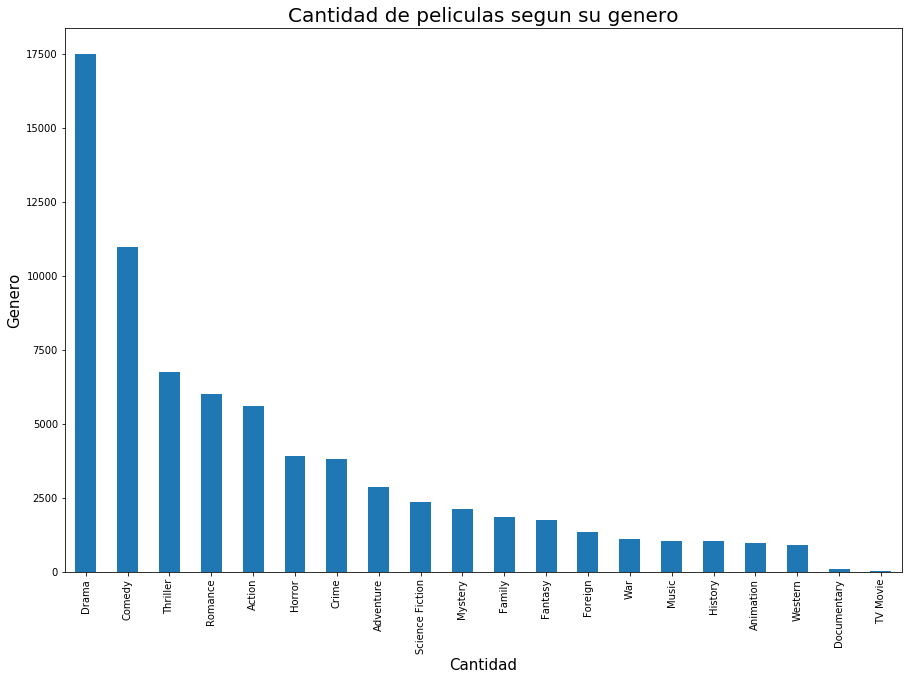

In [12]:
#grafico de cuantas peliculas se generan 
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = genero_peliculas_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas segun su genero', fontsize = 20)
plt.ylabel('Genero', fontsize = 15)
plt.xlabel('Cantidad', fontsize = 15)
plt.show()

In [13]:
# agregamos las columnas de 0 y 1 al dataframe movie_ratings_2
#df_genre = pd.DataFrame()
#for genre in generos_totales:
    #df_genre[genre] = movie_ratings_2['genres'].str.contains(genre).map(lambda x:1 if x else 0)
#movie_ratings_2 = movie_ratings_2.join(df_genre) unir los generos con el movie_ratings_2 columans de 1 y 0

In [14]:
%%time
paises = []
for ind in movie_ratings_2['production_countries'].index:
    x = ast.literal_eval(movie_ratings_2['production_countries'][ind])
    if len(x) > 0:
        countries = []
        countries_str = ''
        for dat in x:
            pais = dat['name']
            countries.append(dat['name'])
            countries_str += f'{pais},'
            if dat['name'] not in paises:
                paises.append(dat['name'])
    #movie_ratings_2['production_countries'][ind] = countries
    movie_ratings_2['production_countries'][ind] = countries_str


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Wall time: 12.1 s


In [15]:
# hacemos el mismo analisis hecho anteriormente, pero ahora con los paises, veremos cuanta produccion de peliculas tiene cada pais 
df_countries = pd.DataFrame()
for pais in paises:
    df_countries[pais] = movie_ratings_2['production_countries'].str.contains(pais).map(lambda x:1 if x else 0)

In [16]:
# a este data frame le agregaremos el ano para poder hacer una comparacion de cuantas peliculas se filman en un pais
df_countries['year'] = movie_ratings_2["year"]
# hacemos groupby segun el ano para ver las cta de peliculas por pais
peliculas_pais_ano = df_countries.groupby('year').sum()
# hacemos sort para ver el grafico en orden
peliculas_pais_ano_sumados = peliculas_pais_ano.sum().sort_values(ascending=False)

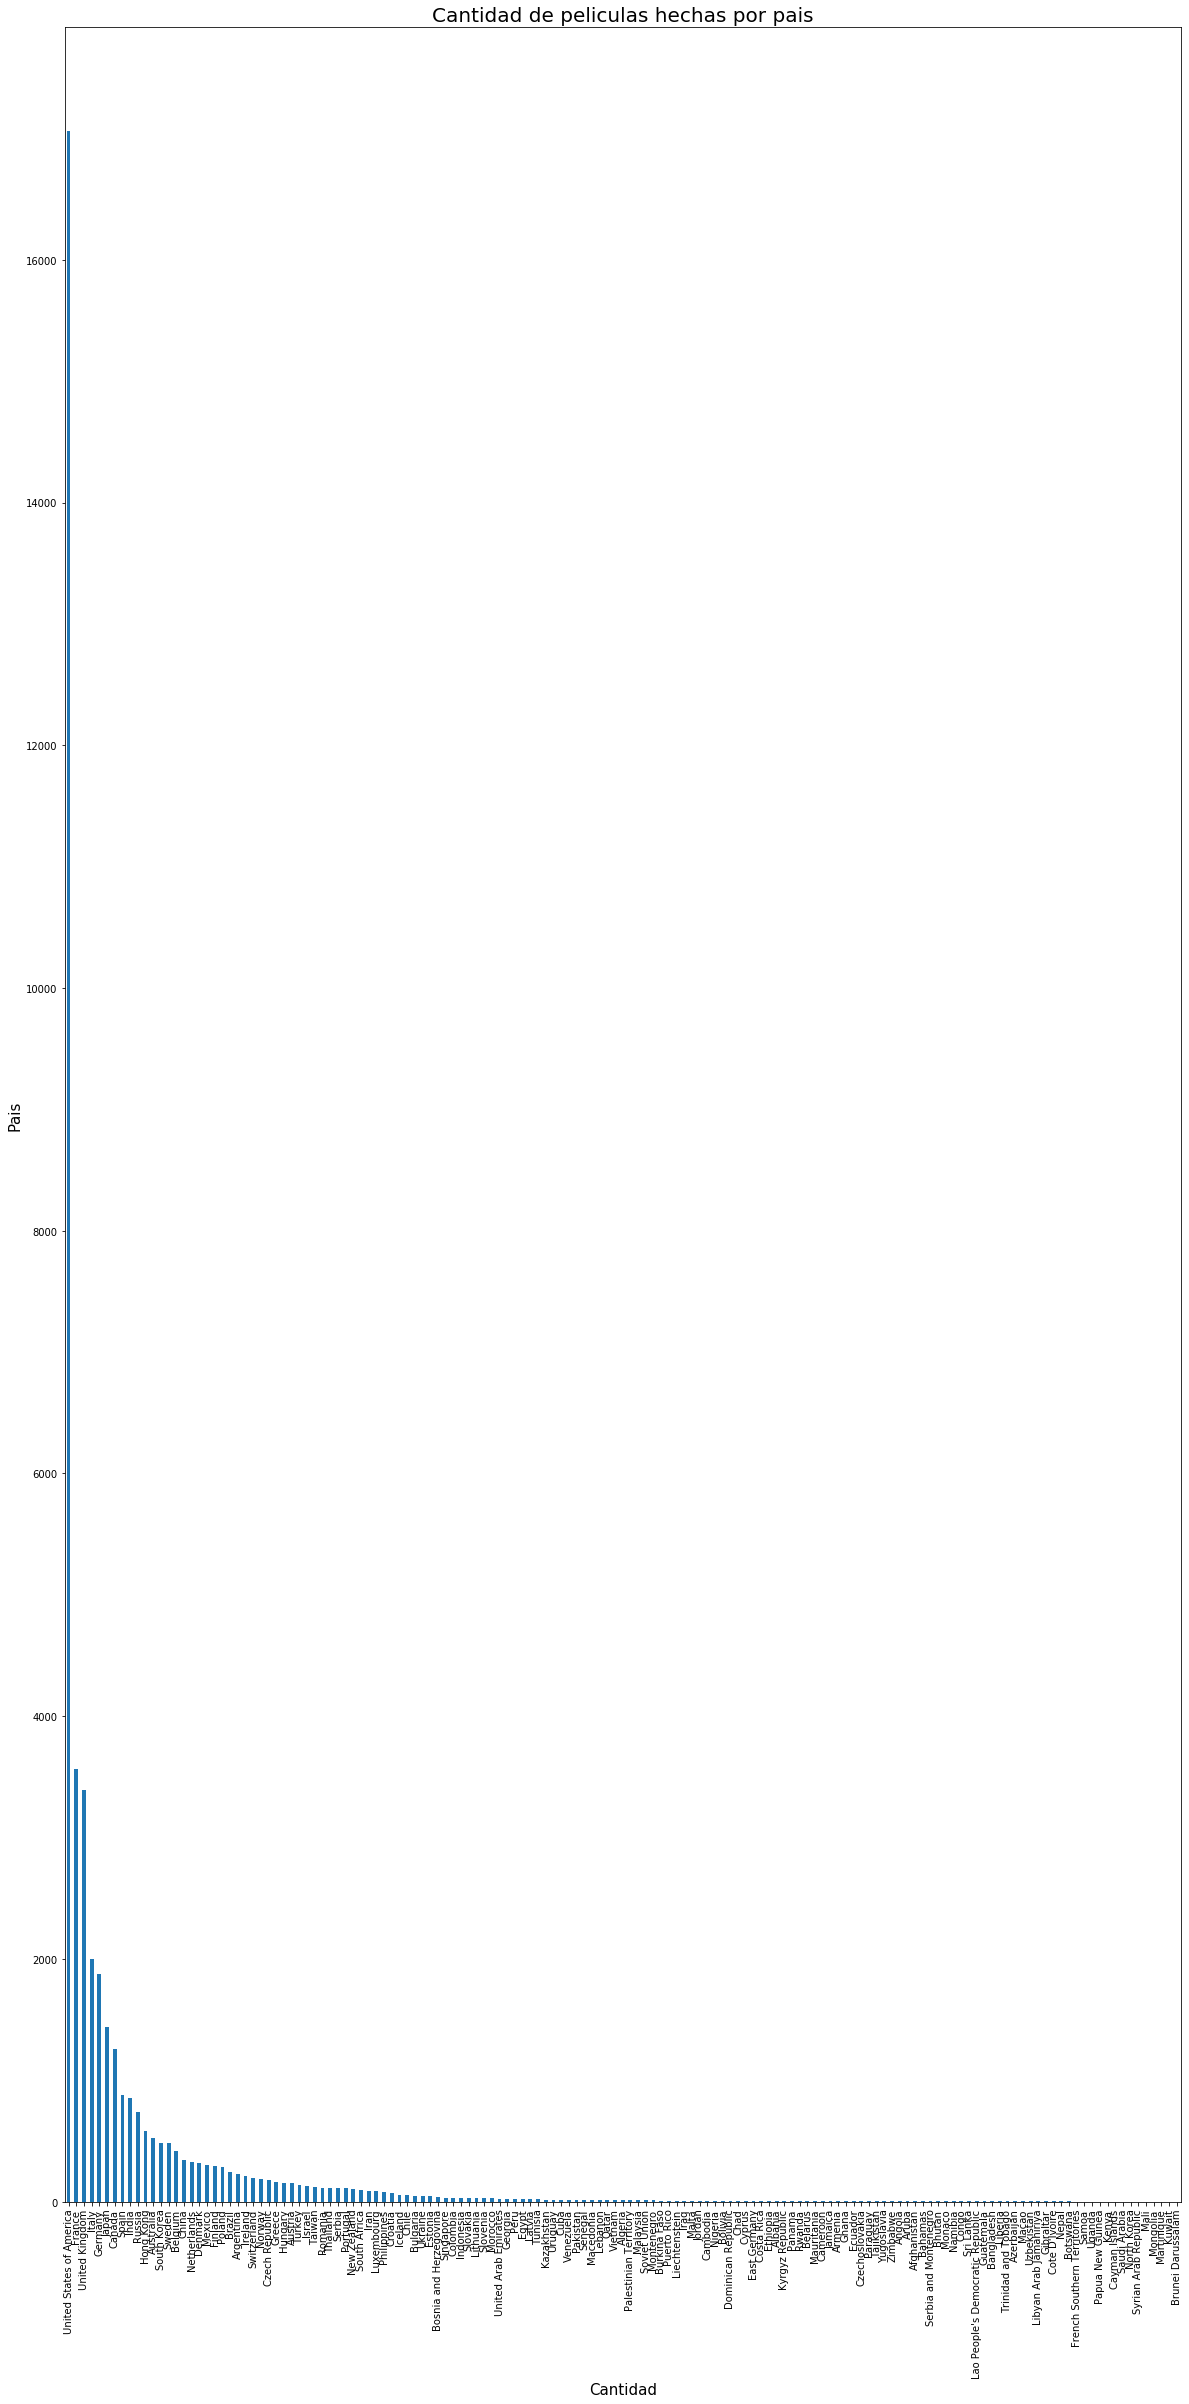

In [17]:
#grafico de cuantas peliculas en un pais se generan
fig = plt.figure(figsize=(20,40))
ax = plt.subplot(1,1,1)
# un grafico de barras para que sea mas descriptivo y facil de analizar
ax = peliculas_pais_ano_sumados.plot.bar()
plt.xticks(rotation=90)
plt.title('Cantidad de peliculas hechas por pais', fontsize = 20)
plt.ylabel('Pais', fontsize = 15)
plt.xlabel('Cantidad', fontsize = 15)
plt.show()

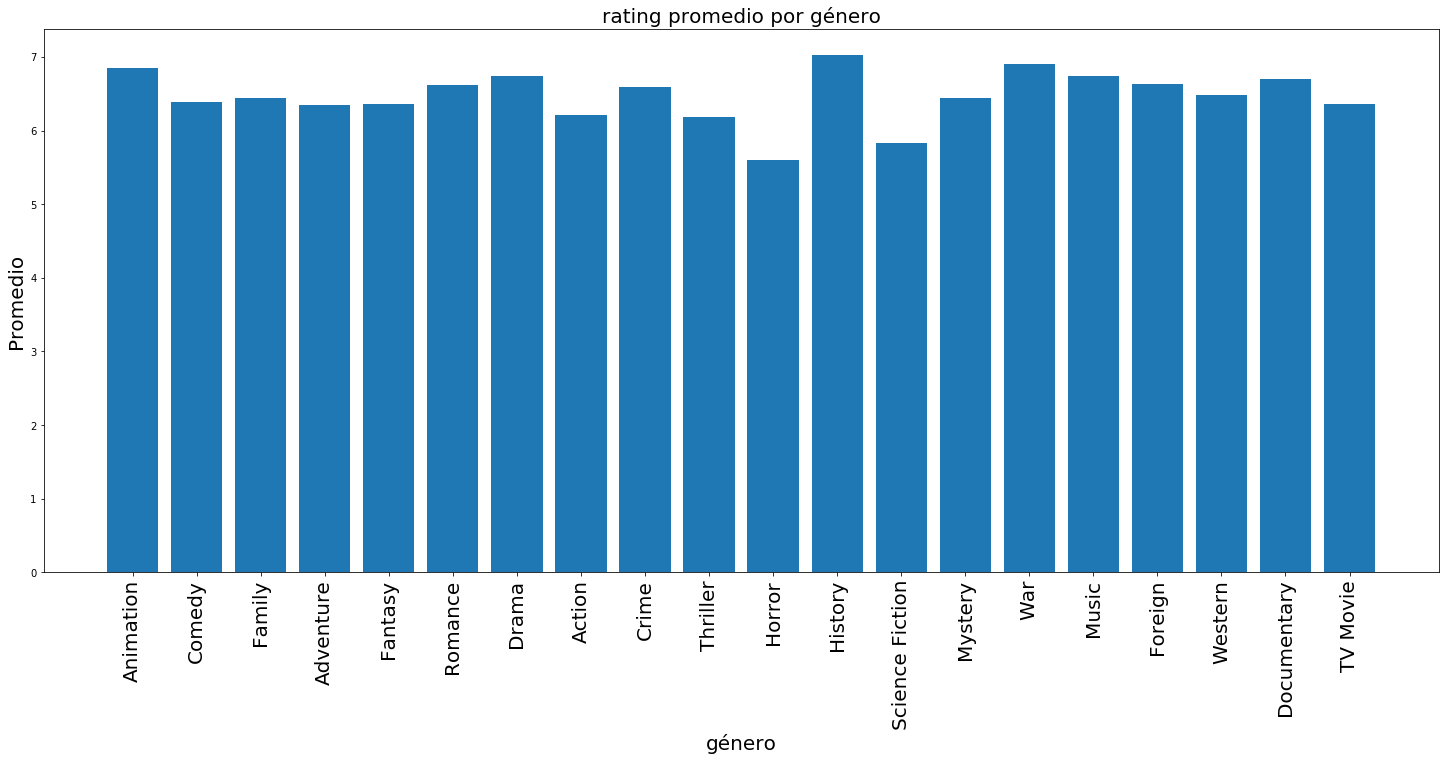

1.9041266441345215


In [18]:
start = time.time()
genres = {}
for genre in movie_ratings_2['genres']:
    for g in genre.split(','):
        if g not in genres:
            genres[g] = []

for ind in movie_ratings_2.index:
    gen = movie_ratings_2['genres'][ind].split(',')
    for g in gen:
        genres[g].append(movie_ratings_2['mean_vote'][ind])

for genre in genres:
    genres[genre] = sum(genres[genre])/len(genres[genre])

names = list(genres.keys())
values = list(genres.values())

fig = plt.figure(figsize=(25,10))
plt.bar(range(len(genres)), values, tick_label=names)
plt.xticks(rotation=90, fontsize = 20)
plt.title('rating promedio por género', fontsize = 20)
plt.ylabel('Promedio', fontsize = 20)
plt.xlabel('género', fontsize = 20)
plt.show()
end = time.time()
print(end - start)

In [19]:
# ocupamos tittle y el ano para poder hacer merge con el dataset de los oscars 
title = movie_ratings_2['title'].to_list()
ano = movie_ratings_2['year'].to_list()
pelicula_ano = []
for i in range(len(title)):
    movie= title[i]
    year = ano[i]
    movie_year = f'{movie}[{year}]'
    pelicula_ano.append(movie_year)
movie_ratings_2['Pelicula'] = pelicula_ano
columns = ['Pelicula','runtime','genres','mean_vote']
movies_ratings_2_merge = movie_ratings_2[columns]
movies_ratings_2_merge.head()

Pelicula  runtime                    genres  \
0                    Toy Story[1995]     81.0   Animation,Comedy,Family   
1                      Jumanji[1995]    104.0  Adventure,Fantasy,Family   
2             Grumpier Old Men[1995]    101.0            Romance,Comedy   
3            Waiting to Exhale[1995]    127.0      Comedy,Drama,Romance   
4  Father of the Bride Part II[1995]    106.0                    Comedy   

   mean_vote  
0        8.3  
1        7.1  
2        6.8  
3        6.2  
4        6.2

In [20]:
# hacemos el merge segun el title con los oscars
movie_oscars = pd.merge(movies_ratings_2_merge, df, left_on = 'Pelicula', right_on = 'Pelicula', how = 'left')
movie_oscars = movie_oscars.dropna().reset_index(drop=True)
print(movie_oscars.shape)
movie_oscars.sort_values('Nominaciones', ascending = False).head()

(2447, 6)


Pelicula  runtime  \
335                                       Titanic[1997]    194.0   
2409                                   La La Land[2016]    128.0   
995                                       Chicago[2002]    113.0   
888   The Lord of the Rings: The Fellowship of the R...    178.0   
141                            Gone with the Wind[1939]    238.0   

                               genres  mean_vote  Nominaciones  Premios  
335            Drama,Romance,Thriller        7.8          14.0     11.0  
2409       Comedy,Drama,Music,Romance        7.9          14.0      6.0  
995   Action,Comedy,Crime,Drama,Music        7.3          13.0      6.0  
888          Adventure,Fantasy,Action        8.7          13.0      4.0  
141                 Drama,Romance,War        8.1          13.0      8.0

In [21]:
"""
Descargamos geodataset para relacionar país con calidad y recepción de producciones.
Sjoin debe ser por columna "sovereight"
"""
#url = 'https://data.opendatasoft.com/explore/dataset/natural-earth-countries-1_110m@public/download/?format=geojson&timezone=America/Santo_Domingo&lang=en'
#gdf_paises = gpd.read_file(url)
#gdf_paises

'\nDescargamos geodataset para relacionar país con calidad y recepción de producciones.\nSjoin debe ser por columna "sovereight"\n'

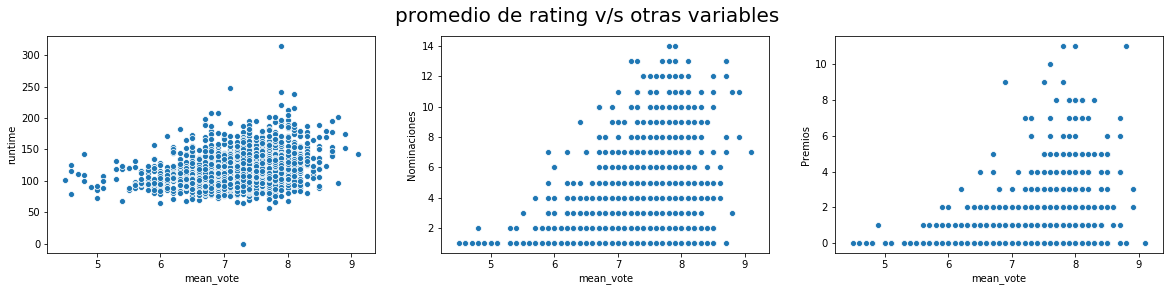

In [22]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(20,4))
fig.suptitle('promedio de rating v/s otras variables', size=(20))

sns.scatterplot(ax = axes[0], data=movie_oscars, x="mean_vote", y='runtime')


sns.scatterplot(ax = axes[1], data=movie_oscars, x="mean_vote", y='Nominaciones')


sns.scatterplot(ax = axes[2], data=movie_oscars, x="mean_vote", y='Premios')

In [23]:
movie_oscars

Pelicula  runtime  \
0                          Toy Story[1995]     81.0   
1                            Sabrina[1995]    127.0   
2             The American President[1995]    106.0   
3                              Nixon[1995]    192.0   
4                             Casino[1995]    178.0   
...                                    ...      ...   
2442  War for the Planet of the Apes[2017]    140.0   
2443                  The Glass Cell[1978]     93.0   
2444                On Body and Soul[2017]    116.0   
2445                         Dunkirk[2017]    107.0   
2446                         Pharaoh[1966]    180.0   

                                 genres  mean_vote  Nominaciones  Premios  
0               Animation,Comedy,Family        8.3           3.0      0.0  
1                        Comedy,Romance        6.5           2.0      0.0  
2                  Comedy,Drama,Romance        7.0           1.0      0.0  
3                         History,Drama        7.1           4.0      0.0  
4                           Drama,Crime        8.2           1.0      0.0  
...                                 ...        ...           ...      ...  
2442          Drama,Science Fiction,War        7.5           1.0      0.0  
2443                        Drama,Crime        6.9           1.0      0.0  
2444                      Drama,Romance        7.6           1.0      0.0  
2445  Action,Drama,History,Thriller,War        7.8           8.0      3.0  
2446                            History        7.6           1.0      0.0  

[2447 rows x 6 columns]

In [24]:
movie_ratings_2

title               original_title  \
0                        Toy Story                    Toy Story   
1                          Jumanji                      Jumanji   
2                 Grumpier Old Men             Grumpier Old Men   
3                Waiting to Exhale            Waiting to Exhale   
4      Father of the Bride Part II  Father of the Bride Part II   
...                            ...                          ...   
32826             House of Horrors             House of Horrors   
32827              Caged Heat 3000              Caged Heat 3000   
32828                   Robin Hood                   Robin Hood   
32829          Century of Birthing          Siglo ng Pagluluwal   
32830                     Betrayal                     Betrayal   

                         genres      id    imdb_id original_language  \
0       Animation,Comedy,Family     862  tt0114709                en   
1      Adventure,Fantasy,Family    8844  tt0113497                en   
2                Romance,Comedy   15602  tt0113228                en   
3          Comedy,Drama,Romance   31357  tt0114885                en   
4                        Comedy   11862  tt0113041                en   
...                         ...     ...        ...               ...   
32826   Horror,Mystery,Thriller   84419  tt0038621                en   
32827           Science Fiction  222848  tt0112613                en   
32828      Drama,Action,Romance   30840  tt0102797                en   
32829                     Drama  111109  tt2028550                tl   
32830     Action,Drama,Thriller   67758  tt0303758                en   

      popularity release_date  \
0        21.9469   1995-10-30   
1        17.0155   1995-12-15   
2        11.7129   1995-12-22   
3        3.85949   1995-12-22   
4        8.38752   1995-02-10   
...          ...          ...   
32826   0.222814   1946-03-29   
32827   0.661558   1995-01-01   
32828   5.683753   1991-05-13   
32829   0.178241   2011-11-17   
32830   0.903007   2003-08-01   

                                    production_countries  runtime  \
0                              United States of America,     81.0   
1                              United States of America,    104.0   
2                              United States of America,    101.0   
3                              United States of America,    127.0   
4                              United States of America,    106.0   
...                                                  ...      ...   
32826                          United States of America,     65.0   
32827                          United States of America,     85.0   
32828  Canada,Germany,United Kingdom,United States of...    104.0   
32829                                       Philippines,    360.0   
32830                          United States of America,     90.0   

      imdb_title_id  weighted_average_vote  total_votes  mean_vote  year  \
0         tt0114709                    8.3     864461.0        8.3  1995   
1         tt0113497                    7.0     299083.0        7.1  1995   
2         tt0113228                    6.7      23742.0        6.8  1995   
3         tt0114885                    5.9       9353.0        6.2  1995   
4         tt0113041                    6.1      33587.0        6.2  1995   
...             ...                    ...          ...        ...   ...   
32826     tt0038621                    6.2        729.0        6.3  1946   
32827     tt0112613                    3.8        217.0        4.4  1995   
32828     tt0102797                    5.8       4583.0        6.1  1991   
32829     tt2028550                    7.1        190.0        7.1  2011   
32830     tt0303758                    4.3        855.0        4.3  2003   

                                Pelicula  
0                        Toy Story[1995]  
1                          Jumanji[1995]  
2                 Grumpier Old Men[1995]  
3                Waiting to Exhale[1995]  
4    

In [26]:
for ind in movie_ratings_2.index:
    print(ind)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

2277
2278
2279
2280
2281
2282
2283
2284
2285
2286
2287
2288
2289
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2448
2449
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
2460
2461
2462
2463
2464
2465
2466
2467
2468
2469
2470
2471
2472
2473
2474
2475
2476
2478


5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506
5507
5508
5509
5510
5511
5512
5513
5514
5515
5516
5517
5518
5519
5520
5521
5522
5523
5524
5525
5526
5527
5528
5529
5530
5531
5532
5533
5534
5535
5536
5537
5538
5539
5540
5541
5542
5543
5544
5545
5546
5547
5548
5549
5550
5551
5552
5553
5554
5555
5556
5557
5558
5559
5560
5561
5562
5563
5564
5565
5566
5567
5568
5569
5570
5571
5572
5573
5574
5575
5576
5577
5578
5579
5580
5581
5582
5583
5584
5585
5586
5587
5588
5589
5590
5591
5592
5593
5594
5595
5596
5597
5598
5599
5600
5601
5602
5603
5604
5605
5606
5607
5608
5609
5610
5611
5612
5613
5614
5615
5616
5617
5618
5619
5620
5621
5622
5623


8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663
8664
8665
8666
8667
8668
8669
8670
8671
8672
8673
8674
8675
8676
8677
8678
8679
8680
8681
8682
8683
8684


11273
11274
11275
11276
11277
11278
11279
11280
11281
11282
11283
11284
11285
11286
11287
11288
11289
11290
11291
11292
11293
11294
11295
11296
11297
11298
11299
11300
11301
11302
11303
11304
11305
11306
11307
11308
11309
11310
11311
11312
11313
11314
11315
11317
11319
11320
11321
11322
11323
11324
11325
11326
11327
11328
11329
11330
11331
11332
11333
11334
11335
11336
11337
11338
11339
11340
11341
11342
11343
11344
11345
11346
11347
11348
11349
11350
11351
11352
11353
11356
11357
11358
11359
11360
11361
11362
11363
11364
11365
11366
11367
11368
11369
11370
11371
11372
11373
11374
11376
11377
11378
11379
11380
11381
11382
11383
11384
11385
11386
11387
11388
11389
11390
11391
11392
11393
11394
11395
11396
11397
11398
11399
11400
11401
11402
11403
11404
11405
11406
11407
11408
11409
11410
11411
11412
11413
11414
11415
11416
11417
11418
11419
11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
1144

12996
12997
12998
12999
13000
13001
13002
13003
13004
13005
13006
13007
13008
13009
13010
13011
13012
13013
13014
13015
13016
13017
13018
13019
13020
13021
13022
13023
13024
13025
13026
13027
13028
13029
13030
13031
13032
13033
13034
13035
13036
13037
13038
13039
13040
13041
13042
13043
13044
13045
13046
13047
13048
13049
13050
13051
13052
13053
13054
13055
13056
13057
13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
1316

14751
14752
14753
14754
14755
14756
14757
14758
14759
14760
14761
14762
14763
14764
14765
14766
14767
14768
14769
14770
14771
14772
14773
14774
14775
14776
14777
14778
14779
14780
14781
14782
14783
14784
14785
14786
14787
14788
14789
14790
14791
14792
14793
14794
14795
14796
14797
14798
14799
14800
14801
14802
14803
14804
14805
14806
14807
14808
14809
14810
14811
14812
14813
14814
14815
14816
14817
14818
14819
14820
14821
14822
14823
14824
14825
14826
14827
14828
14829
14830
14831
14832
14833
14834
14835
14836
14837
14838
14839
14840
14841
14842
14843
14844
14845
14846
14847
14848
14849
14850
14851
14852
14853
14854
14855
14856
14857
14858
14859
14860
14861
14862
14863
14864
14865
14866
14867
14868
14869
14870
14871
14872
14873
14874
14875
14876
14877
14878
14879
14880
14881
14882
14883
14884
14885
14886
14887
14888
14889
14890
14891
14892
14893
14894
14895
14896
14897
14898
14899
14900
14901
14902
14903
14904
14905
14906
14907
14908
14909
14911
14913
14914
14915
14916
14917
14918
1491

16332
16333
16334
16335
16336
16337
16338
16339
16340
16341
16342
16343
16344
16345
16346
16347
16348
16349
16350
16351
16352
16353
16354
16355
16356
16357
16358
16359
16360
16361
16362
16363
16364
16365
16366
16367
16368
16369
16370
16371
16372
16373
16374
16375
16376
16377
16378
16379
16380
16381
16382
16383
16384
16385
16386
16387
16388
16389
16390
16391
16392
16393
16394
16395
16396
16397
16398
16399
16400
16401
16402
16403
16404
16405
16406
16407
16409
16410
16411
16412
16413
16414
16415
16416
16417
16418
16419
16420
16421
16422
16423
16424
16425
16426
16427
16428
16429
16430
16431
16432
16433
16434
16435
16436
16437
16438
16439
16440
16441
16442
16443
16444
16445
16446
16447
16448
16449
16450
16451
16452
16453
16454
16455
16456
16457
16458
16459
16460
16461
16462
16463
16464
16465
16466
16467
16468
16469
16470
16471
16472
16473
16474
16475
16476
16477
16478
16479
16480
16481
16482
16483
16484
16485
16486
16487
16488
16489
16490
16491
16492
16493
16494
16495
16496
16497
16498
1649

17952
17953
17954
17955
17956
17957
17958
17959
17960
17961
17962
17963
17964
17965
17966
17967
17968
17969
17970
17971
17972
17973
17974
17975
17976
17977
17978
17979
17980
17981
17982
17983
17984
17985
17986
17987
17988
17989
17990
17991
17992
17993
17994
17995
17996
17997
17998
17999
18000
18001
18002
18003
18004
18005
18006
18007
18008
18009
18010
18011
18012
18013
18014
18015
18016
18017
18018
18019
18020
18021
18022
18023
18024
18025
18026
18027
18028
18029
18030
18031
18032
18033
18034
18035
18036
18037
18038
18039
18040
18041
18042
18043
18044
18045
18046
18047
18048
18049
18050
18051
18052
18053
18054
18055
18056
18057
18058
18059
18060
18061
18062
18063
18064
18065
18066
18067
18068
18069
18070
18072
18073
18074
18075
18076
18077
18078
18079
18080
18081
18082
18083
18084
18085
18086
18087
18088
18089
18090
18091
18092
18093
18094
18095
18096
18097
18098
18099
18100
18101
18102
18103
18104
18105
18106
18107
18108
18109
18110
18111
18112
18113
18114
18115
18116
18117
18118
1811

19693
19694
19695
19696
19697
19698
19699
19700
19701
19702
19703
19704
19705
19706
19707
19708
19709
19710
19711
19712
19713
19714
19715
19716
19717
19718
19719
19720
19721
19722
19723
19724
19725
19726
19727
19728
19729
19730
19731
19732
19733
19734
19735
19736
19737
19738
19739
19740
19741
19742
19743
19744
19745
19746
19747
19748
19749
19750
19751
19752
19753
19754
19755
19756
19757
19758
19759
19760
19761
19762
19763
19764
19765
19766
19767
19768
19769
19770
19771
19772
19773
19774
19775
19776
19777
19778
19779
19780
19781
19782
19783
19784
19785
19786
19787
19788
19789
19790
19791
19792
19793
19794
19795
19796
19797
19799
19800
19801
19802
19803
19804
19805
19806
19807
19808
19809
19810
19811
19812
19813
19814
19815
19816
19817
19818
19819
19820
19821
19822
19823
19824
19825
19826
19827
19828
19829
19830
19831
19832
19833
19834
19835
19836
19837
19838
19839
19840
19841
19842
19843
19844
19845
19846
19847
19848
19849
19850
19851
19852
19853
19854
19855
19856
19857
19858
19859
1986

21186
21187
21188
21189
21190
21191
21192
21193
21194
21195
21196
21197
21198
21199
21200
21201
21202
21203
21204
21205
21206
21207
21208
21209
21210
21211
21212
21213
21214
21215
21216
21217
21218
21219
21220
21221
21222
21223
21224
21225
21226
21227
21228
21229
21230
21232
21233
21234
21235
21236
21237
21238
21239
21240
21241
21242
21243
21244
21245
21246
21247
21248
21249
21250
21251
21252
21253
21254
21255
21256
21257
21258
21259
21260
21261
21262
21263
21264
21265
21266
21267
21268
21269
21270
21271
21272
21273
21274
21275
21276
21277
21278
21279
21280
21281
21282
21283
21284
21285
21286
21287
21288
21289
21290
21291
21292
21293
21294
21295
21296
21297
21298
21299
21300
21301
21302
21303
21304
21305
21306
21307
21308
21309
21310
21311
21312
21313
21314
21315
21316
21317
21318
21319
21320
21321
21322
21323
21324
21325
21326
21327
21328
21329
21330
21331
21332
21333
21334
21335
21336
21337
21338
21339
21340
21341
21342
21343
21344
21345
21346
21347
21348
21349
21350
21351
21352
2135

22662
22663
22664
22665
22666
22667
22668
22669
22670
22671
22672
22673
22674
22675
22676
22677
22678
22679
22680
22681
22682
22683
22684
22685
22686
22687
22688
22689
22690
22691
22692
22693
22694
22695
22696
22697
22698
22699
22700
22701
22703
22704
22705
22706
22707
22708
22709
22710
22711
22712
22713
22714
22715
22716
22717
22718
22719
22720
22721
22722
22723
22724
22725
22726
22727
22728
22729
22730
22731
22732
22733
22734
22735
22736
22737
22738
22739
22740
22741
22742
22743
22744
22745
22746
22747
22748
22749
22750
22751
22752
22753
22754
22755
22756
22757
22758
22759
22760
22761
22762
22763
22764
22765
22766
22767
22768
22769
22770
22771
22772
22773
22774
22775
22776
22777
22778
22779
22780
22781
22782
22783
22784
22785
22786
22787
22788
22789
22790
22791
22792
22793
22794
22795
22796
22797
22798
22799
22800
22801
22802
22803
22804
22805
22806
22807
22808
22809
22810
22811
22812
22813
22814
22815
22816
22817
22818
22819
22820
22821
22822
22823
22824
22825
22826
22827
22828
2282

25349
25350
25351
25352
25353
25354
25355
25356
25357
25358
25359
25360
25361
25362
25363
25364
25365
25367
25368
25369
25370
25371
25372
25373
25374
25375
25376
25377
25378
25379
25380
25381
25382
25383
25384
25385
25386
25387
25388
25389
25390
25391
25392
25393
25394
25395
25396
25397
25398
25399
25400
25401
25402
25403
25404
25405
25406
25407
25408
25409
25410
25411
25412
25413
25414
25415
25416
25417
25418
25419
25420
25421
25422
25423
25424
25425
25426
25427
25428
25429
25430
25431
25432
25433
25434
25435
25436
25437
25438
25439
25440
25441
25442
25443
25444
25445
25446
25447
25448
25449
25450
25451
25452
25453
25454
25455
25456
25457
25458
25459
25460
25461
25462
25463
25464
25465
25466
25467
25468
25469
25470
25471
25472
25473
25474
25475
25476
25477
25478
25479
25480
25481
25482
25483
25484
25486
25487
25488
25489
25490
25491
25492
25493
25494
25495
25496
25497
25498
25499
25500
25501
25502
25503
25504
25505
25506
25507
25508
25509
25510
25511
25512
25513
25514
25515
25516
2551

27071
27072
27073
27074
27075
27076
27078
27079
27080
27081
27082
27083
27084
27085
27086
27087
27088
27089
27090
27091
27092
27093
27094
27095
27096
27097
27098
27099
27100
27101
27102
27103
27104
27105
27106
27107
27108
27109
27110
27111
27112
27114
27115
27116
27117
27118
27119
27120
27121
27122
27123
27124
27125
27126
27127
27128
27129
27130
27131
27132
27133
27134
27135
27136
27137
27138
27139
27140
27141
27142
27143
27144
27145
27146
27147
27148
27149
27150
27151
27152
27153
27154
27155
27156
27157
27158
27159
27160
27161
27162
27163
27164
27165
27166
27167
27168
27169
27170
27171
27172
27173
27174
27175
27176
27177
27178
27179
27180
27181
27182
27183
27184
27185
27186
27187
27188
27189
27190
27191
27192
27193
27194
27195
27196
27197
27198
27199
27200
27201
27202
27203
27204
27205
27206
27207
27208
27209
27210
27211
27212
27213
27214
27215
27216
27217
27218
27219
27220
27221
27222
27223
27224
27225
27226
27227
27228
27229
27230
27231
27232
27233
27234
27235
27236
27237
27238
2723

28561
28562
28563
28564
28565
28566
28567
28568
28569
28570
28571
28572
28573
28574
28575
28576
28577
28578
28579
28581
28582
28583
28584
28585
28586
28587
28588
28589
28590
28591
28592
28593
28594
28595
28596
28597
28598
28599
28600
28601
28602
28603
28604
28605
28606
28607
28608
28609
28610
28611
28612
28613
28614
28615
28616
28617
28618
28619
28620
28621
28622
28623
28624
28625
28626
28627
28628
28629
28630
28631
28632
28633
28634
28635
28636
28637
28638
28639
28640
28641
28642
28643
28644
28645
28646
28647
28648
28649
28650
28651
28652
28653
28654
28655
28656
28657
28658
28659
28660
28661
28662
28663
28664
28665
28666
28667
28668
28669
28670
28671
28672
28673
28674
28675
28676
28677
28678
28679
28680
28681
28682
28683
28684
28685
28686
28687
28688
28689
28690
28691
28692
28693
28694
28695
28696
28697
28698
28699
28700
28701
28702
28703
28704
28705
28706
28707
28708
28709
28710
28711
28712
28713
28714
28715
28716
28717
28718
28719
28720
28721
28722
28723
28724
28725
28726
28727
2872

30312
30313
30314
30315
30316
30317
30318
30319
30320
30321
30322
30323
30324
30325
30326
30327
30328
30329
30330
30331
30332
30333
30334
30335
30336
30337
30338
30339
30340
30341
30342
30343
30344
30345
30346
30347
30348
30349
30350
30351
30352
30353
30354
30355
30356
30357
30358
30359
30360
30361
30362
30363
30364
30365
30366
30367
30368
30369
30370
30371
30372
30373
30374
30375
30377
30378
30379
30380
30381
30382
30383
30384
30385
30386
30387
30388
30389
30390
30391
30392
30393
30394
30395
30396
30397
30398
30399
30400
30401
30402
30403
30404
30405
30406
30407
30408
30409
30410
30411
30412
30413
30414
30415
30416
30417
30418
30419
30420
30421
30422
30423
30424
30425
30426
30427
30428
30429
30430
30431
30432
30433
30434
30435
30436
30437
30438
30439
30440
30441
30442
30443
30444
30445
30446
30447
30448
30449
30450
30451
30452
30453
30454
30455
30456
30457
30458
30459
30460
30461
30462
30463
30464
30465
30466
30467
30468
30469
30470
30471
30472
30473
30474
30475
30476
30477
30478
3047

32707
32708
32709
32710
32711
32712
32713
32714
32715
32716
32717
32718
32719
32720
32721
32722
32723
32724
32725
32726
32727
32728
32729
32730
32731
32732
32733
32734
32735
32736
32737
32738
32739
32740
32741
32742
32743
32744
32745
32746
32747
32748
32749
32750
32751
32752
32753
32754
32755
32756
32757
32758
32759
32760
32761
32762
32763
32764
32765
32766
32767
32768
32769
32770
32771
32772
32773
32774
32775
32776
32777
32778
32779
32780
32781
32782
32783
32784
32785
32786
32787
32788
32789
32790
32791
32792
32793
32794
32795
32796
32797
32798
32799
32800
32801
32802
32803
32804
32805
32806
32807
32808
32809
32810
32811
32812
32813
32814
32815
32816
32817
32818
32819
32820
32821
32822
32823
32824
32825
32826
32827
32828
32829
32830


In [27]:
# hacemos el merge segun la Peliculacon los oscars
columns = ['Pelicula','runtime','genres','mean_vote', 'year']
movie_lr = movie_ratings_2[columns]
movie_oscars_lr = pd.merge(movie_lr, df, left_on = 'Pelicula', right_on = 'Pelicula', how = 'left')
movie_oscars_lr.sort_values('mean_vote', ascending = False).head()
movie_oscars_lr.fillna(0, inplace=True)
movie_oscars_lr.head()

Pelicula  runtime                    genres  \
0                    Toy Story[1995]     81.0   Animation,Comedy,Family   
1                      Jumanji[1995]    104.0  Adventure,Fantasy,Family   
2             Grumpier Old Men[1995]    101.0            Romance,Comedy   
3            Waiting to Exhale[1995]    127.0      Comedy,Drama,Romance   
4  Father of the Bride Part II[1995]    106.0                    Comedy   

   mean_vote  year  Nominaciones  Premios  
0        8.3  1995           3.0      0.0  
1        7.1  1995           0.0      0.0  
2        6.8  1995           0.0      0.0  
3        6.2  1995           0.0      0.0  
4        6.2  1995           0.0      0.0

movie_oscars_lr

In [28]:
movie_oscars_lr

Pelicula  runtime                    genres  \
0                        Toy Story[1995]     81.0   Animation,Comedy,Family   
1                          Jumanji[1995]    104.0  Adventure,Fantasy,Family   
2                 Grumpier Old Men[1995]    101.0            Romance,Comedy   
3                Waiting to Exhale[1995]    127.0      Comedy,Drama,Romance   
4      Father of the Bride Part II[1995]    106.0                    Comedy   
...                                  ...      ...                       ...   
32575             House of Horrors[1946]     65.0   Horror,Mystery,Thriller   
32576              Caged Heat 3000[1995]     85.0           Science Fiction   
32577                   Robin Hood[1991]    104.0      Drama,Action,Romance   
32578          Century of Birthing[2011]    360.0                     Drama   
32579                     Betrayal[2003]     90.0     Action,Drama,Thriller   

       mean_vote  year  Nominaciones  Premios  
0            8.3  1995           3.0      0.0  
1            7.1  1995           0.0      0.0  
2            6.8  1995           0.0      0.0  
3            6.2  1995           0.0      0.0  
4            6.2  1995           0.0      0.0  
...          ...   ...           ...      ...  
32575        6.3  1946           0.0      0.0  
32576        4.4  1995           0.0      0.0  
32577        6.1  1991           0.0      0.0  
32578        7.1  2011           0.0      0.0  
32579        4.3  2003           0.0      0.0  

[32580 rows x 7 columns]

In [29]:
# ocupamos la lista generos creada anteriormente.
df_genre = pd.DataFrame()
for genre in generos_totales:
    df_genre[genre] = movie_oscars_lr['genres'].str.contains(genre).map(lambda x:1 if x else 0)
movie_oscars_lr = movie_oscars_lr.join(df_genre) #unir los generos con el movie_oscars_lr columans de 1 y 0
movie_oscars_lr.head()


Pelicula  runtime                    genres  \
0                    Toy Story[1995]     81.0   Animation,Comedy,Family   
1                      Jumanji[1995]    104.0  Adventure,Fantasy,Family   
2             Grumpier Old Men[1995]    101.0            Romance,Comedy   
3            Waiting to Exhale[1995]    127.0      Comedy,Drama,Romance   
4  Father of the Bride Part II[1995]    106.0                    Comedy   

   mean_vote  year  Nominaciones  Premios  Animation  Comedy  Family  ...  \
0        8.3  1995           3.0      0.0          1       1       1  ...   
1        7.1  1995           0.0      0.0          0       0       1  ...   
2        6.8  1995           0.0      0.0          0       1       0  ...   
3        6.2  1995           0.0      0.0          0       1       0  ...   
4        6.2  1995           0.0      0.0          0       1       0  ...   

   Horror  History  Science Fiction  Mystery  War  Music  Foreign  Western  \
0       0        0                0        0    0      0        0        0   
1       0        0                0        0    0      0        0        0   
2       0        0                0        0    0      0        0        0   
3       0        0                0        0    0      0        0        0   
4       0        0                0        0    0      0        0        0   

   Documentary  TV Movie  
0            0         0  
1            0         0  
2            0         0  
3            0         0  
4            0         0  

[5 rows x 27 columns]

In [31]:
movie_oscars_lr=movie_oscars_lr.drop(['genres'], axis=1)

In [32]:
movie_oscars_lr

Pelicula  runtime  mean_vote  year  \
0                        Toy Story[1995]     81.0        8.3  1995   
1                          Jumanji[1995]    104.0        7.1  1995   
2                 Grumpier Old Men[1995]    101.0        6.8  1995   
3                Waiting to Exhale[1995]    127.0        6.2  1995   
4      Father of the Bride Part II[1995]    106.0        6.2  1995   
...                                  ...      ...        ...   ...   
32575             House of Horrors[1946]     65.0        6.3  1946   
32576              Caged Heat 3000[1995]     85.0        4.4  1995   
32577                   Robin Hood[1991]    104.0        6.1  1991   
32578          Century of Birthing[2011]    360.0        7.1  2011   
32579                     Betrayal[2003]     90.0        4.3  2003   

       Nominaciones  Premios  Animation  Comedy  Family  Adventure  ...  \
0               3.0      0.0          1       1       1          0  ...   
1               0.0      0.0          0       0       1          1  ...   
2               0.0      0.0          0       1       0          0  ...   
3               0.0      0.0          0       1       0          0  ...   
4               0.0      0.0          0       1       0          0  ...   
...             ...      ...        ...     ...     ...        ...  ...   
32575           0.0      0.0          0       0       0          0  ...   
32576           0.0      0.0          0       0       0          0  ...   
32577           0.0      0.0          0       0       0          0  ...   
32578           0.0      0.0          0       0       0          0  ...   
32579           0.0      0.0          0       0       0          0  ...   

       Horror  History  Science Fiction  Mystery  War  Music  Foreign  \
0           0        0                0        0    0      0        0   
1           0        0                0        0    0      0        0   
2           0        0                0        0    0      0        0   
3           0        0                0        0    0      0        0   
4           0        0                0        0    0      0        0   
...       ...      ...              ...      ...  ...    ...      ...   
32575       1        0                0        1    0      0        0   
32576       0        0                1        0    0      0        0   
32577       0        0                0        0    0      0        0   
32578       0        0                0        0    0      0        0   
32579       0        0                0        0    0      0        0   

       Western  Documentary  TV Movie  
0            0            0         0  
1            0            0         0  
2            0            0         0  
3            0            0         0  
4            0            0         0  
...        ...          ...       ...  
32575        0            0         0  
32576        0            0         0  
32577        0            0         0  
32578        0            0         0  
32579        0            0         0  

[32580 rows x 26 columns]

In [33]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

In [123]:
col = [i for i in movie_oscars_lr if i not in ['Pelicula', 'mean_vote']]

x = movie_oscars_lr[col]
y = movie_oscars_lr['mean_vote']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

lr = LinearRegression(normalize = True)
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [63]:
true = y_test.values
pred = lr.predict(x_test)

In [64]:
%%time
# RMSE
((true-pred)**2).mean()

Wall time: 987 µs


0.7336286426692399

In [65]:
%%time
mean_squared_error(true, pred)

Wall time: 999 µs


0.7336286426692399

In [66]:
from sklearn.metrics import mean_absolute_error

In [67]:
%%time
mean_absolute_error(true, pred)

Wall time: 1 ms


0.6562521024403449

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  import sys


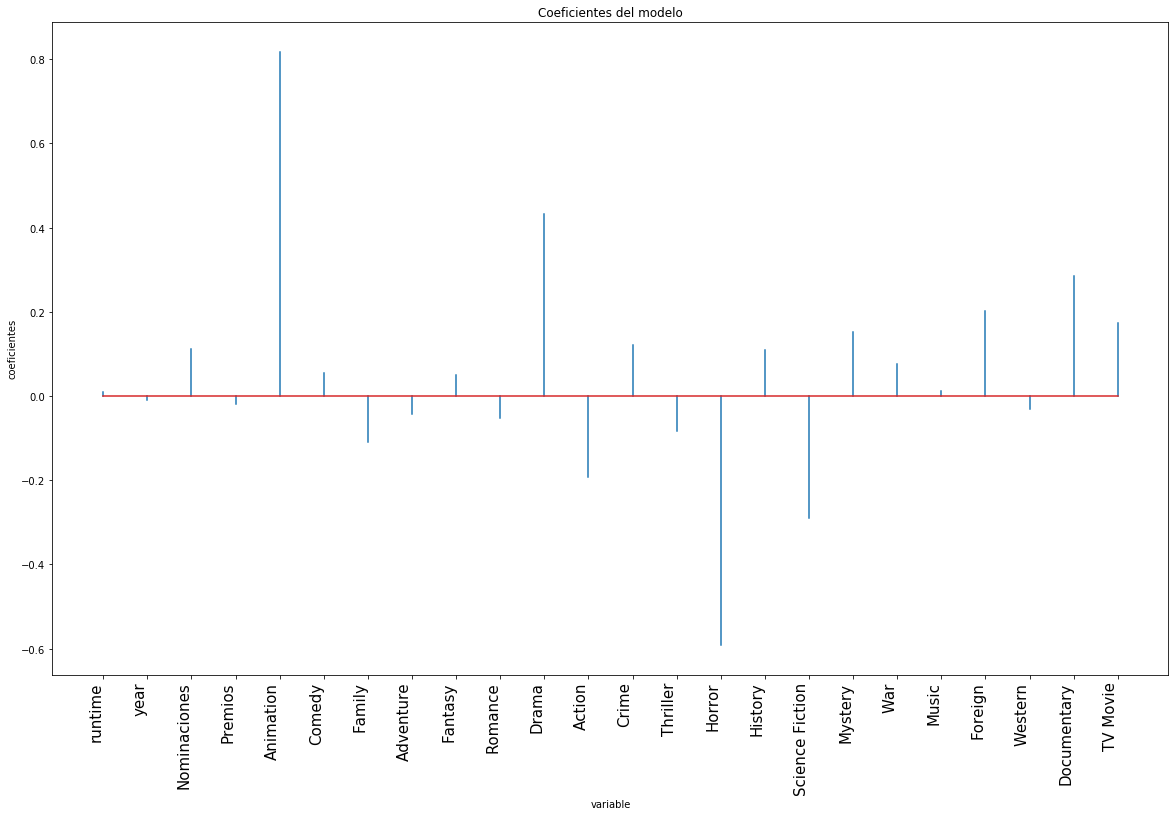

In [79]:
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': linreg.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 12))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=15)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [72]:
import numpy as np

In [73]:
modelo = RidgeCV(
            alphas          = np.logspace(-10, 2, 200),
            fit_intercept   = True,
            normalize       = True,
            store_cv_values = True
         )

_ = modelo.fit(X = x_train, y = y_train)

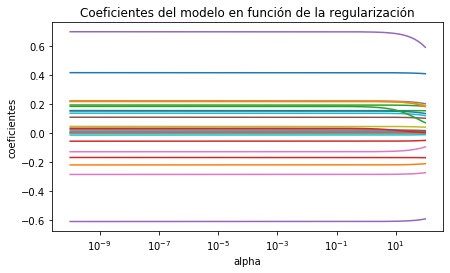

In [75]:
# Evolución de los coeficientes en función de alpha
# ==============================================================================
alphas = modelo.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=False, normalize=True)
    modelo_temp.fit(x_train, y_train)
    coefs.append(modelo_temp.coef_.flatten())

fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('alpha')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

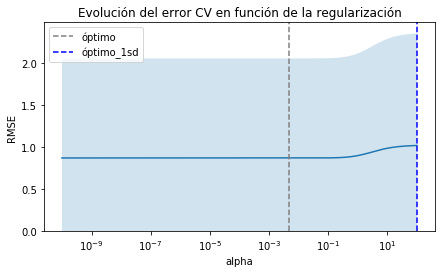

In [76]:
# Evolución del error en función de alpha
# ==============================================================================
# modelo.cv_values almacena el mse de cv para cada valor de alpha. Tiene
# dimensiones (n_samples, n_targets, n_alphas)
mse_cv = modelo.cv_values_.reshape((-1, 200)).mean(axis=0)
mse_sd = modelo.cv_values_.reshape((-1, 200)).std(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)
rmse_sd = np.sqrt(mse_sd)

# Se identifica el óptimo y el óptimo + 1std
min_rmse     = np.min(rmse_cv)
sd_min_rmse  = rmse_sd[np.argmin(rmse_cv)]
min_rsme_1sd = np.max(rmse_cv[rmse_cv <= min_rmse + sd_min_rmse])
optimo       = modelo.alphas[np.argmin(rmse_cv)]
optimo_1sd   = modelo.alphas[rmse_cv == min_rsme_1sd]


# Gráfico del error +- 1 desviación estándar
fig, ax = plt.subplots(figsize=(7, 3.84))
ax.plot(modelo.alphas, rmse_cv)
ax.fill_between(
    modelo.alphas,
    rmse_cv + rmse_sd,
    rmse_cv - rmse_sd,
    alpha=0.2
)

ax.axvline(
    x         = optimo,
    c         = "gray",
    linestyle = '--',
    label     = 'óptimo'
)

ax.axvline(
    x         = optimo_1sd,
    c         = "blue",
    linestyle = '--',
    label     = 'óptimo_1sd'
)
ax.set_xscale('log')
ax.set_ylim([0,None])
ax.set_title('Evolución del error CV en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.legend();

In [77]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo.alpha_}")

Mejor valor de alpha encontrado: 0.004552935074866948


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':


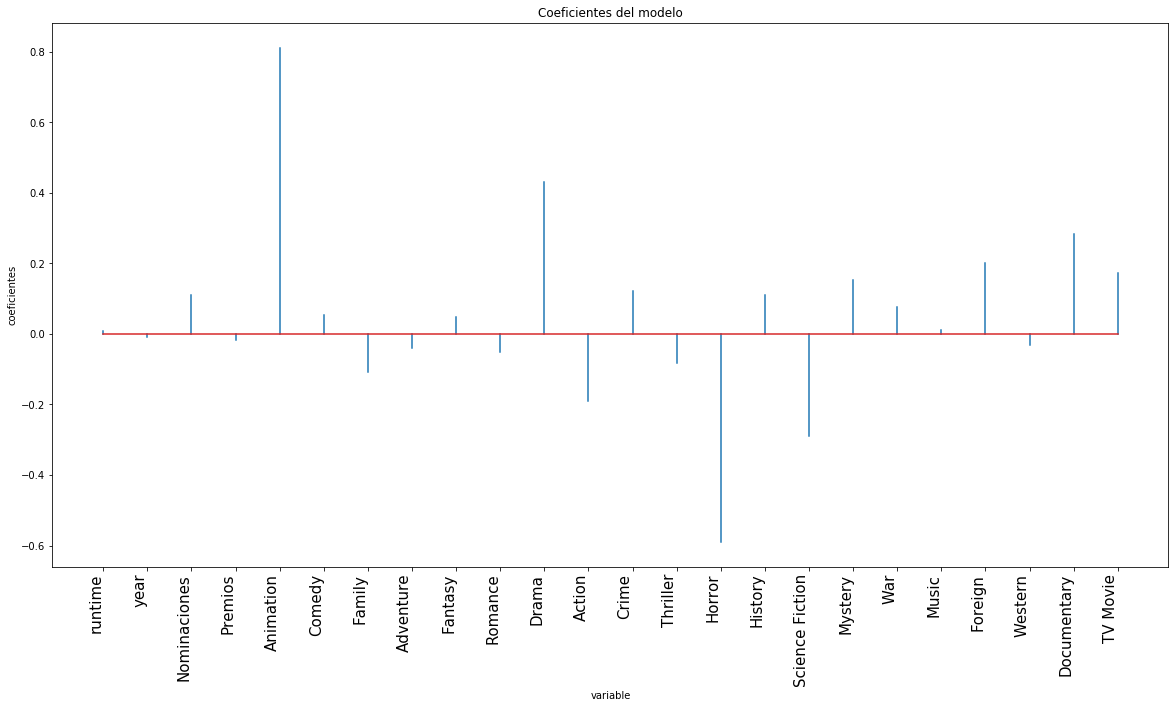

In [78]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(20, 10))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=15)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo');

In [82]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': lr.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

predictor      coef
0           runtime  0.008592
1              year -0.008433
2      Nominaciones  0.111353
3           Premios -0.018263
4         Animation  0.817489
5            Comedy  0.055531
6            Family -0.109731
7         Adventure -0.041387
8           Fantasy  0.049793
9           Romance -0.051465
10            Drama  0.432416
11           Action -0.191562
12            Crime  0.120570
13         Thriller -0.081972
14           Horror -0.591019
15          History  0.110422
16  Science Fiction -0.290505
17          Mystery  0.153244
18              War  0.076382
19            Music  0.011091
20          Foreign  0.202748
21          Western -0.031095
22      Documentary  0.286100
23         TV Movie  0.173696

In [83]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': x_train.columns,
                         'coef': modelo.coef_.flatten()}
                  )

# Predictores incluidos en el modelo (coeficiente != 0)
df_coeficientes[df_coeficientes.coef != 0]

predictor      coef
0           runtime  0.008551
1              year -0.008387
2      Nominaciones  0.110625
3           Premios -0.016193
4         Animation  0.811497
5            Comedy  0.054276
6            Family -0.108085
7         Adventure -0.041271
8           Fantasy  0.049273
9           Romance -0.050223
10            Drama  0.430543
11           Action -0.190823
12            Crime  0.120539
13         Thriller -0.082625
14           Horror -0.589472
15          History  0.111196
16  Science Fiction -0.290144
17          Mystery  0.152537
18              War  0.077219
19            Music  0.011982
20          Foreign  0.201619
21          Western -0.030781
22      Documentary  0.284109
23         TV Movie  0.172101

In [92]:
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_validate

In [99]:
# Verificacion de las metricas para ver si nuestro modelo va por buen camino
metricas_cv = cross_validate(lr, x, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
test_r2 = np.mean(metricas_cv['test_r2'])
train_r2 = np.mean(metricas_cv['train_r2'])
mse_test = -(np.mean(metricas_cv['test_neg_mean_squared_error']))
mse_train = -(np.mean(metricas_cv['train_neg_mean_squared_error']))
print(f'----Linear Regresion----')
print(f'R2[Test]: {test_r2}')
print(f'R2[Train]: {train_r2}')
print(f'MSE[Test]: {mse_test}')
print(f'MSE[Train]: {mse_train}')

----Linear Regresion----
R2[Test]: 0.22928803961083144
R2[Train]: 0.2822491617089652
MSE[Test]: 0.7709886421794435
MSE[Train]: 0.7489500577803656


In [101]:
# Verificacion de las metricas para ver si nuestro modelo va por buen camino
metricas_cv = cross_validate(modelo, x, y, cv=5,
                        scoring=('r2', 'neg_mean_squared_error'),
                        return_train_score=True)
test_r2 = np.mean(metricas_cv['test_r2'])
train_r2 = np.mean(metricas_cv['train_r2'])
mse_test = -(np.mean(metricas_cv['test_neg_mean_squared_error']))
mse_train = -(np.mean(metricas_cv['train_neg_mean_squared_error']))
print(f'------Ridge Regresion------')
print(f'R2[Test]: {test_r2}')
print(f'R2[Train]: {train_r2}')
print(f'MSE[Test]: {mse_test}')
print(f'MSE[Train]: {mse_train}')

------Ridge Regresion------
R2[Test]: 0.2293163696358101
R2[Train]: 0.28224549298129636
MSE[Test]: 0.7709745241093672
MSE[Train]: 0.7489538892100248


In [124]:
for model in (lr, modelo):
    runtime=0
    year=0
    Nominaciones=0
    Premios=0
    Animation=0
    Comedy=0
    Family=0
    Adventure=0
    Fantasy=0
    Romance=0
    Drama=0
    Action=0
    Crime=0
    Thriller=0
    Horror=0
    History=0
    Science_Fiction=0
    Mystery=0
    War=0
    Music=0
    Foreign=0
    Western=0
    Documentary=0
    TV_Movie=0
    print(model.predict(np.array([[runtime,year,Nominaciones,Premios,Animation,Comedy,Family,Adventure,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,History,Science_Fiction,Mystery,War,Music,Foreign,Western,Documentary,TV_Movie]])))

[22.19647858]
[22.1093136]
